In [1]:
import pandas as pd
from taigapy import create_taiga_client_v3
import re

In [2]:
tc = create_taiga_client_v3()

We tried using the `OmiicsSomaticMutationsMatrixDamaging` and the `OmicsSomaticMutations`  but we decided to annotate the maf with OncoKB to get all the annotated mutations.

In [5]:
e3_ligases = pd.read_excel("data/E3_ligase_list.xlsx", skiprows=1)

In [6]:
e3_ligases.head()

,Symbol,HGNC,uniprot_ids,Confidence Score,Ge.et.al,UbiHub,UbiBrowser
0,AHCTF1,HGNC:24618,Q8WYP5,1,Yes,No,No
1,ODAD2,HGNC:25583,Q5T2S8,1,Yes,No,No
2,BAZ1A,HGNC:960,Q9NRL2,1,Yes,No,No
3,BAZ1B,HGNC:961,Q9UIG0,1,Yes,No,No
4,BPTF,HGNC:3581,Q12830,1,Yes,No,No


In [7]:
e3_ligases = e3_ligases.loc[e3_ligases["Confidence Score"] >= 3]

In [8]:
e3_ligases = e3_ligases.iloc[1:, 0].str.strip().to_list()

In [9]:
len(e3_ligases)

490

Downloaded directly from depmap because the Taiga2 api didn't work with the `raw` maf file

In [10]:
som_muts_maf = pd.read_csv("pydata/internal-24q4_v116-omicssomaticmutationsmafprofile-maf", sep="\t")

In [11]:
som_muts_maf.head()

,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Variant_Classification,Protein_Change,Hugo_Symbol,NCBI_Build,Strand,InFrame
0,chr1,818203,818203,SNP,G,G,A,PR-t8SaQo,Splice_Site,NaN,FAM87B,GRCh38,+,False
1,chr1,851926,851926,SNP,G,G,A,PR-lhMBt6,Splice_Site,NaN,LINC01128,GRCh38,+,False
2,chr1,852112,852112,SNP,T,T,C,PR-v6so3W,Splice_Site,NaN,LINC01128,GRCh38,+,False
3,chr1,924510,924511,DNP,GC,GC,AA,PR-uKiczK,Missense_Mutation,p.A27K,SAMD11,GRCh38,+,False
4,chr1,924657,924657,SNP,C,C,G,PR-sxFiuq,Missense_Mutation,p.L76V,SAMD11,GRCh38,+,False


In [12]:
som_muts_maf.columns

Index(['Chromosome', 'Start_Position', 'End_Position', 'Variant_Type',
       'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
       'Tumor_Sample_Barcode', 'Variant_Classification', 'Protein_Change',
       'Hugo_Symbol', 'NCBI_Build', 'Strand', 'InFrame'],
      dtype='object')

To filter by `ModelID` we have to use the Profiles data frame, because the maf file is annotated with the profiles

In [15]:
profiles = tc.get(name='internal-24q4-8c04', version=101, file='OmicsProfiles')

In [16]:
profiles.head()

,ProfileID,ModelCondition,ModelID,Datatype,WESKit,Product,Stranded,Source,SharedToDbgap
0,PR-01r7OM,MC-000957-Yckn,ACH-000957,rna,None,None,False,BROAD,None
1,PR-02J1g6,MC-001150-wyma,ACH-001150,wgs,None,None,None,BROAD,None
2,PR-02XmLG,MC-002785-qo9e,ACH-002785,rna,None,None,True,BROAD,None
3,PR-032KRL,MC-002175-99up,ACH-002175,wgs,None,None,None,BROAD,None
4,PR-03qHWS,MC-000753-DxZw,ACH-000753,wgs,None,None,None,BROAD,None


Getting models id from the expression data

In [17]:
models = pd.read_csv("pydata/E3_expr.csv", usecols=[0])

In [18]:
models.head()

,ModelID
0,ACH-000873
1,ACH-000860
2,ACH-000439
3,ACH-000318
4,ACH-001142


In [19]:
profiles.shape

(5964, 9)

In [20]:
profiles = profiles.loc[profiles["ModelID"].isin(models["ModelID"].values)]

In [21]:
profiles.shape

(5627, 9)

In [22]:
som_muts_maf = som_muts_maf.loc[(som_muts_maf["Hugo_Symbol"].isin(e3_ligases)) & som_muts_maf["Tumor_Sample_Barcode"].isin(profiles["ProfileID"])]

For OncoKB annotator

In [23]:
# som_muts_maf.to_csv("pydata/E3ligases_mutations.maf", sep="\t")

After OncoKB annotator

In [24]:
som_muts_maf_annot = pd.read_csv("pydata/E3ligases_mutations_oncoKBannotated.maf", sep ="\t")

/var/folders/_5/qbyf0kk5779gpj3nnpqbc7wr0000gn/T/ipykernel_40239/3460813069.py:1: DtypeWarning: Columns (21,22,23,25,28,29,31,33,37,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  som_muts_maf_annot = pd.read_csv("pydata/E3ligases_mutations_oncoKBannotated.maf", sep ="\t")


In [25]:
som_muts_maf_annot.head()

,Unnamed: 0,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Variant_Classification,...,LEVEL_Dx1,LEVEL_Dx2,LEVEL_Dx3,HIGHEST_DX_LEVEL,DX_CITATIONS,LEVEL_Px1,LEVEL_Px2,LEVEL_Px3,HIGHEST_PX_LEVEL,PX_CITATIONS
0,57,chr1,960730,960730,SNP,C,C,A,PR-GYB91T,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58,chr1,960766,960766,SNP,G,G,A,PR-voYF6y,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59,chr1,960779,960779,SNP,C,C,T,PR-EsLxqT,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60,chr1,961298,961298,SNP,A,A,G,PR-RWQgdj,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,chr1,961327,961327,SNP,C,C,G,PR-rq0sPs,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
som_muts_maf_annot = som_muts_maf_annot.loc[som_muts_maf_annot["Hugo_Symbol"].isin(e3_ligases)]

In [28]:
som_muts_maf_annot["ONCOGENIC"].value_counts()

ONCOGENIC
Unknown             29908
Likely Oncogenic      798
Oncogenic              75
Inconclusive           42
Likely Neutral          2
Name: count, dtype: int64

In [30]:
som_muts_maf_annot["MUTATION_EFFECT"].value_counts()

MUTATION_EFFECT
Unknown                    29930
Likely Loss-of-function      738
Loss-of-function             113
Inconclusive                  42
Likely Neutral                 2
Name: count, dtype: int64

In [31]:
som_muts_maf_annot = som_muts_maf_annot.loc[(som_muts_maf_annot["MUTATION_EFFECT"] != "Unknown") & 
                                            (som_muts_maf_annot["MUTATION_EFFECT"] != "Likely Neutral") &
                                            (som_muts_maf_annot["MUTATION_EFFECT"] != "Inconclusive")]

In [32]:
som_muts_maf_annot.shape

(851, 42)

In [33]:
som_muts_maf_annot["MUTATION_EFFECT"] = som_muts_maf_annot["MUTATION_EFFECT"].apply(lambda mut: re.sub("Likely ", "", mut))

In [98]:
som_muts_maf_annot["MUTATION_EFFECT"].value_counts()

MUTATION_EFFECT
Loss-of-function    2481
Gain-of-function      32
Name: count, dtype: int64

In [34]:
som_muts_maf_annot["ONCOGENIC"].value_counts()

ONCOGENIC
Likely Oncogenic    776
Oncogenic            75
Name: count, dtype: int64

## Ploting comut

In [47]:
models = pd.read_pickle("pydata/model_data.pkl")

In [48]:
models.head()

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,None,...,None,None,None,NIHOVCAR3_OVARY,None,Available in SRA,None,2201.0,SIDM00105,905933.0
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",...,None,None,None,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,55.0,SIDM00829,905938.0
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,None,...,None,None,None,CACO2_LARGE_INTESTINE,None,Available in SRA,None,NaN,SIDM00891,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",...,None,None,None,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,783.0,SIDM00594,907053.0
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,...,None,None,None,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,NaN,SIDM00593,NaN


In [52]:
models = models.merge(profiles[["ModelID", "ProfileID"]], on = "ModelID")

In [54]:
models = models.loc[models["ProfileID"].isin(som_muts_maf_annot["Tumor_Sample_Barcode"].values)]

In [35]:
from comut import comut

In [42]:
comut_data = som_muts_maf_annot[["Hugo_Symbol", "Tumor_Sample_Barcode","Variant_Classification", "MUTATION_EFFECT"]]

In [43]:
comut_data = comut_data.rename(columns={"Tumor_Sample_Barcode": "sample","Hugo_Symbol": "category", "Variant_Classification": "value"})

In [ ]:
sample_data =  

In [44]:
comut_data.head()

,category,sample,value,MUTATION_EFFECT
5550,EED,PR-8WZowy,Frame_Shift_Del,Loss-of-function
5557,EED,PR-Liv3nx,Frame_Shift_Del,Loss-of-function
5558,EED,PR-yDgpga,Splice_Site,Loss-of-function
5566,EED,PR-BGUgGC,Splice_Site,Loss-of-function
5613,BIRC3,PR-GGvVBy,Nonsense_Mutation,Loss-of-function


In [ ]:
comut_data.add_categorical_data(biopsy_df, name = 'Biopsy site')

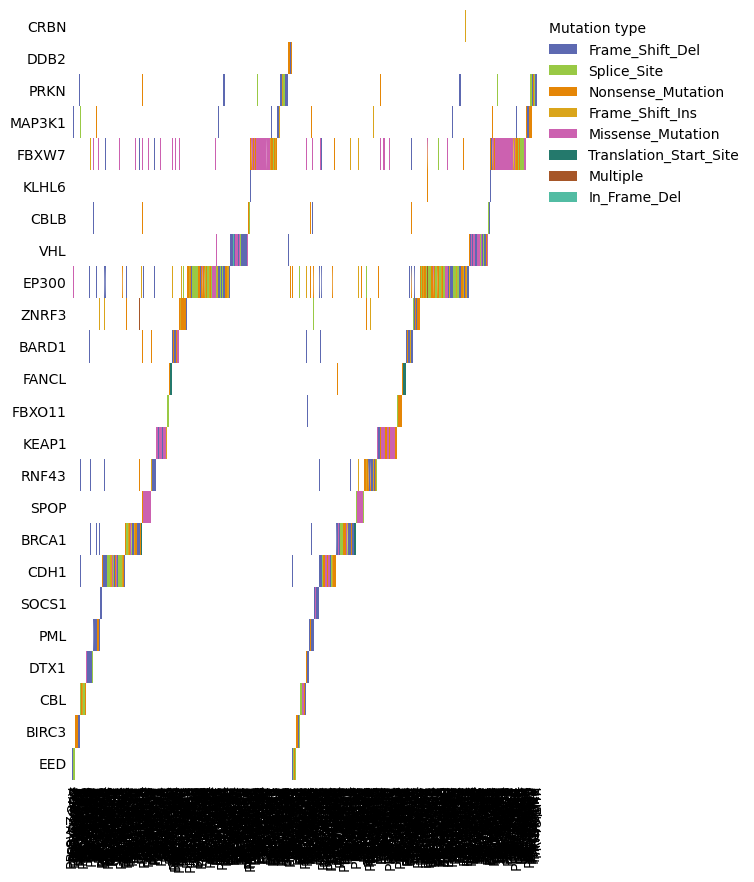

In [45]:
e3l_comut = comut.CoMut()
e3l_comut.add_categorical_data(comut_data, name = 'Mutation type')
e3l_comut.plot_comut(figsize = (6,10))
e3l_comut.add_unified_legend()

In [24]:
hot_muts = tc.get(name='internal-24q4-8c04', version=101, file='OmicsSomaticMutationsMatrixHotspot')

[                      ]  0% |   0.0 s/B |   0.0 B /  10.0 MiB | ETA:  --:--:--
[#####             ] 29% |  30.2 MiB/s |   3.0 MiB /  10.0 MiB | ETA:   0:00:00
[#######           ] 39% |  25.5 MiB/s |   4.0 MiB /  10.0 MiB | ETA:   0:00:00
[##########        ] 59% |  25.5 MiB/s |   6.0 MiB /  10.0 MiB | ETA:   0:00:00
[##############    ] 79% |  24.7 MiB/s |   8.0 MiB /  10.0 MiB | ETA:   0:00:00
[################  ] 89% |  23.5 MiB/s |   9.0 MiB /  10.0 MiB | ETA:   0:00:00
[##################]100% |  24.4 MiB/s |  10.0 MiB /  10.0 MiB | Time:  0:00:00


In [28]:
hot_muts = hot_muts.loc[:, e3_ligases_found]

In [29]:
hot_muts.shape

(2395, 43)

In [30]:
hot_muts.sum()

ARID1A      15.0
DCST1        1.0
LYST         4.0
ZBTB18       2.0
ZBTB16       1.0
CBL          4.0
CHD4         4.0
PDZRN4       2.0
KMT2D        2.0
DMXL2        3.0
BTBD1        1.0
ASB7         1.0
RAB40C       2.0
CREBBP      12.0
CDH1        12.0
BRCA1        7.0
SPOP         2.0
RNF43        4.0
ELP2         1.0
RNF152       2.0
KEAP1       18.0
NWD1         2.0
SH3RF3       1.0
BARD1        1.0
CUL3         1.0
LTN1         2.0
LZTR1        1.0
EP300       17.0
VHL         27.0
DCAF1        1.0
BCL6         1.0
NSD2         3.0
FBXW7       70.0
RICTOR       1.0
SH3RF2       1.0
PPP2R2B      2.0
FBXL4        1.0
ARID1B       1.0
AHR          1.0
CADPS2       2.0
MAGED2       1.0
DCAF12L2     4.0
MAGEC1       0.0
dtype: float64